# Introduction to Clustering

**Clustering** is an unsupervised machine learning technique where the goal is to divide a dataset into groups, or clusters, such that the data points within each group are more similar to each other than to those in other groups. We'll look at 3 types: **K-means**, **Hierarchical** and **DBSCAN Clustering**

## 1. K-Means Clustering
- **How it works:** 
Divides data into 𝐾 clusters by minimizing the sum of squared distances between data points and their corresponding cluster centroids.
- **Strengths:**
    - Fast and efficient on large datasets.
    - Works well when clusters are spherical and well-separated.
- **Weaknesses:**
    - Requires specifying 𝐾 in advance.
    - Sensitive to outliers and initial cluster centroids.
    - Performs poorly with non-spherical clusters or varying cluster densities.
- **Best for:** Clustering when data is roughly spherical, and the number of clusters is known or can be estimated.

**More:** https://www.youtube.com/watch?v=4b5d3muPQmA&t=230s

**Key Terms**:
- **Centroid**: The center of a cluster, used in algorithms like K-Means.
- **Inertia**: A measure of how tightly clustered the points in a cluster are (also known as within-cluster sum of squares).
- **Euclidean Distance**: The straight-line distance between two points, often used in K-Means to assign points to the nearest cluster.

### In Detail:
    
1.  **The centroid** is calculated as the **mean** of all data points (or vectors) within the cluster for each feature (or dimension). In short, the centroid is the average position of all the points in the cluster.

    If you have 3 data points in a cluster with two features (e.g., income and spending score), the centroid for each feature is the average of the feature values of the 3 points.

    For example, if the points are:
    - Point 1: (50, 60)
    - Point 2: (70, 80)
    - Point 3: (60, 90)

    The centroid would be:
    - $
    \text{Centroid for Feature 1 (Income)} = \frac{50 + 70 + 60}{3} = 60
    $
    - $
    \text{Centroid for Feature 2 (Spending Score)} = \frac{60 + 80 + 90}{3} = 76.67
    $

    So the centroid would be at $ (60, 76.67) $.
___    
    
2. **Inertia** in K-Means clustering is a measure of how well the clustering algorithm has grouped the data.The lower the inertia, the better the clustering (as long as it's not overfitting).
    - Inertia decreases as the number of clusters increases, because with more clusters, the data points are closer to their respective centroids. However, if you use too many clusters, inertia may get very low, but the clusters might become too small and lose meaning.
    - In practice, we use the *Elbow Method* to find the optimal number of clusters where the decrease in inertia slows down, indicating that adding more clusters doesn’t significantly improve the clustering.

___

3. **Euclidean Distance** is the shortest distance between two points in space.

   In K-Means clustering, the Euclidean distance is used to:
    - Assign data points to clusters: Each data point is assigned to the cluster whose centroid is closest, where closeness is measured by the Euclidean distance.
    - Update the centroids: Once the points are assigned, the centroids are updated based on the mean of all points in each cluster, and the process repeats.
    
  - However, Euclidean distance assumes that all features are on the same scale. If some features have larger values or more variation, they can dominate the distance calculation. That's why it's common to standardize or normalize the data (e.g., using `StandardScaler`) before using Euclidean distance, especially in algorithms like K-Means.

### Mall Customer Segmentation using the K-Means algorithm

The goal here is to cluster customers into different groups based on their purchasing behavior, demographics, or preferences, allowing businesses to tailor marketing strategies.

In [2]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting capabilities
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling

In [6]:
# Load the dataset (Mall Customer Segmentation Data)

data = pd.read_csv("Mall_Customers.csv")

# Inspect the first few rows of the dataset to understand its structure
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 **`Annual Income (k$)` and `Spending Score (1-100)` are the features we'll use to cluster customers.**

### Check for missing values
This is to ensure data quality. Missing values can affect clustering algorithms.

In [8]:
print(data.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


No missing value, cool!

### Extract relevant features for clustering

In [22]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

### Standardizing the data
Standardization is important because clustering algorithms like K-Means are sensitive to feature scales.

In [24]:
scaler = StandardScaler()  # Initialize the StandardScaler to standardize the features by removing the mean and scaling to unit variance
X_scaled = scaler.fit_transform(X)  # Fit the scaler to the data and then transform the features, returning the standardized version of the dataset 'X'

- `StandardScaler()` adjusts the data so that each feature has `mean=0` and `standard deviation=1`.
- This step ensures that one feature (like income) doesn't dominate others due to its larger scale.

### Using the Elbow method to find the optimal number of clusters
The **Elbow Method** helps to identify the best number of clusters for K-Means by plotting inertia vs. the number of clusters.
- Similar to hyperparameter tuning

The **Elbow Method** is a simple technique used to determine the optimal number of clusters in K-Means clustering.

- **How It Works:**
    1. **Run K-Means**: You run K-Means clustering on your data with different values for the number of clusters (k), typically starting from 1 and going up to 10 or more. 
    2. **Calculate the Inertia or Within-Cluster Sum of Squares (WCSS)**: For each value of k, calculate the sum of the squared distances between data points and the centroid of their assigned cluster. This is called the **WCSS** or **inertia**. It measures how tightly data points are grouped within each cluster—the lower the value, the better the clustering.
    3. **Plot the inertia**: Plot the number of clusters (k) on the x-axis and the inertia on the y-axis.
    4. **Look for the Elbow**: As k increases, the inertia decreases. Initially, the inertia drops sharply as you add more clusters, but after a certain point, the decrease becomes gradual. The "elbow" in the graph is where the rate of decrease slows down, indicating that adding more clusters doesn't significantly improve the clustering.

- **Why It's Called the Elbow Method:**
    - The "elbow" is the point in the graph where the inertia curve bends, resembling the shape of an elbow.
    - The elbow represents a good trade-off: It suggests the ideal number of clusters before adding more clusters stops being useful.

- **Simple Example:**
Imagine you want to group people in a room into clusters. Initially, having just one cluster groups everyone together, and the distance between people and their centroid is large. As you increase the number of clusters, people are grouped more closely together, and the distance decreases. But after a certain point, adding more groups doesn't make a big difference—the elbow shows the sweet spot for how many groups you should use.

- In short, the Elbow Method helps you find the right balance for choosing the number of clusters.

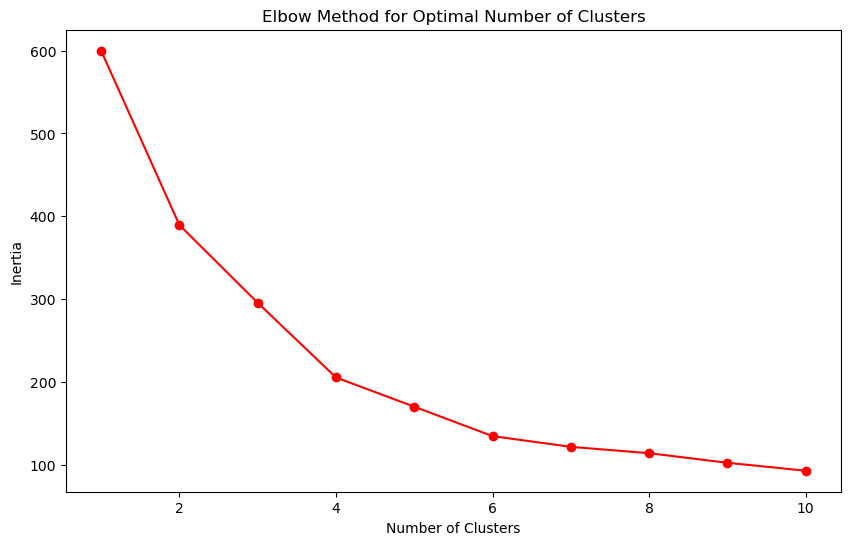

In [26]:
inertia = []  # List to store the inertia values for each number of clusters

for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with the current number of clusters (i)
    kmeans.fit(X_scaled)  # Fit the KMeans model on the standardized data
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(range(1, 11), inertia, 'ro-')  # Plot the number of clusters against inertia with red markers and lines
# 'r': Specifies the color of the plot, in this case, red (r stands for red).
# 'o': Specifies the marker style, which in this case is a circle (o).
# '-': Specifies the line style, which in this case is a solid line (-).

plt.title('Elbow Method for Optimal Number of Clusters')  # Add a title to the plot
plt.xlabel('Number of Clusters')  # Label the x-axis as 'Number of Clusters'
plt.ylabel('Inertia')  # Label the y-axis as 'Inertia' (within-cluster sum of squares)
plt.show()  # Display the plot

#### In this case, we can choose 5 clusters.

In [28]:
# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Initialize the KMeans algorithm with 5 clusters and a fixed random state for reproducibility
kmeans.fit(X_scaled)  # Fit the KMeans model to the standardized data

KMeans(n_clusters=4, random_state=42)

In [30]:
kmeans.inertia_

205.22514747675913

### Add the cluster labels to the original dataset for interpretation

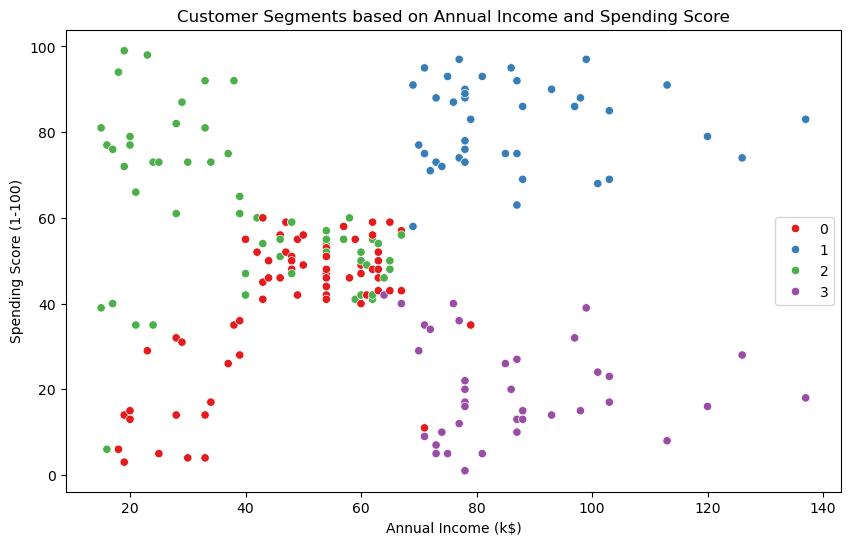

In [32]:
data['Cluster'] = kmeans.labels_  # Assign the cluster labels from the KMeans model to a new column 'Cluster' in the dataset

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')  
# Create a scatter plot with 'Annual Income' on the x-axis, 'Spending Score' on the y-axis, and color the points by their cluster labels
plt.title('Customer Segments based on Annual Income and Spending Score')  # Add a title to the plot
plt.xlabel('Annual Income (k$)')  # Label the x-axis
plt.ylabel('Spending Score (1-100)')  # Label the y-axis
plt.legend()  # Display the legend showing the clusters
plt.show()  # Show the plot


In [34]:
data["Cluster"].value_counts()

Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

In [38]:
# Define a dictionary to map each cluster number to a descriptive label
cluster_labels = {
    2: 'Low Income, Low Spender',
    4: 'High Income, High Spender',
    3: 'Low Income, High Spender',
    0: 'Moderate Income, Moderate Spender',
    1: 'High Income, Low Spender'
}

# Replace cluster numbers with descriptive labels
data['Cluster'] = data['Cluster'].map(cluster_labels)

data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,"Low Income, Low Spender"
1,2,Male,21,15,81,"Low Income, Low Spender"
2,3,Female,20,16,6,"Low Income, Low Spender"
3,4,Female,23,16,77,"Low Income, Low Spender"
4,5,Female,31,17,40,"Low Income, Low Spender"
...,...,...,...,...,...,...
195,196,Female,35,120,79,"High Income, Low Spender"
196,197,Female,45,126,28,"Low Income, High Spender"
197,198,Male,32,126,74,"High Income, Low Spender"
198,199,Male,32,137,18,"Low Income, High Spender"


In [40]:
data.sample(n=20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
86,87,Female,55,57,58,"Moderate Income, Moderate Spender"
103,104,Male,26,62,55,"Low Income, Low Spender"
23,24,Male,31,25,73,"Low Income, Low Spender"
39,40,Female,20,37,75,"Low Income, Low Spender"
116,117,Female,63,65,43,"Moderate Income, Moderate Spender"
19,20,Female,35,23,98,"Low Income, Low Spender"
33,34,Male,18,33,92,"Low Income, Low Spender"
72,73,Female,60,50,49,"Moderate Income, Moderate Spender"
180,181,Female,37,97,32,"Low Income, High Spender"
60,61,Male,70,46,56,"Moderate Income, Moderate Spender"


- Each point in the scatter plot represents a customer, with color indicating which cluster they belong to.
- You can now interpret the clusters to understand different customer segments (e.g., high-income and low-spending vs. low-income and high-spending customers).

### Practice
1. Modify the code to include 'Age' as a feature in addition to 'Annual Income' and 'Spending Score.' How do the clusters change?
2. Try tuning the K-Means algorithm with a different number of clusters and compare your results.

## 2. Hierarchical Clustering
- **How it works:** Builds a hierarchy of clusters by either:
    - **Agglomerative (Bottom-up approach):** Starting with individual points and merging them into larger clusters.
    - **Divisive (Top-down approach):** Starting with the entire dataset and splitting it into smaller clusters.
- **Strengths:**
    - No need to predefine 𝐾.
    - More flexible with the number of clusters and provides a clear visualization of how clusters are formed (via the dendrogram).
- **Weaknesses:**
    - Computationally expensive for large datasets.
    - Can be sensitive to noise.
- **Best for:** 
Datasets where you want a hierarchical structure of clusters or you don’t know the number of clusters in advance.

###  Mall Customer Segmentation using Agglomerative Clustering

**Agglomerative Clustering** is a bottom-up approach to hierarchical clustering where each data point starts in its own cluster, and clusters are merged iteratively based on a linkage criterion until a single cluster or a specified number of clusters is achieved.

#### **Key Terms**:
- **Bottom-Up Approach**: Each data point starts as an individual cluster and merges with the closest clusters.
- **Linkage Criteria**: Determines how the distance between clusters is calculated. Common types are:
  - **Single Linkage**: Minimum distance between points in two clusters.
  - **Complete Linkage**: Maximum distance between points in two clusters.
  - **Average Linkage**: Average distance between points in two clusters.
  - **Ward's Method**: Minimizes the variance within clusters during merging.
- **Dendrogram**: A tree-like diagram that shows the hierarchy of cluster merges.

- **More :** https://www.youtube.com/watch?v=ijUMKMC4f9I

In [42]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for creating plots and visualizations
import seaborn as sns  # Import Seaborn for enhanced data visualization based on Matplotlib
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for normalizing or scaling features before clustering
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # Import dendrogram and linkage for visualizing hierarchical clustering results

In [44]:
# Load the dataset (Mall Customer Segmentation Data)
data = pd.read_csv("Mall_Customers.csv")

# Inspect the first few rows of the dataset to understand its structure
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### We will also use 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for clustering.

In [46]:
# Extract the relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [48]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Standardizing ensures that all features are on the same scale, which is important for distance-based clustering algorithms.

### Step 1: Visualize the Hierarchy using a Dendrogram

In [50]:
# Use scipy's linkage method to perform hierarchical/agglomerative clustering
# 'ward' is the linkage method that minimizes variance within clusters
linked = linkage(X_scaled, method='ward')

**Ward's method** is a popular choice in hierarchical (agglomerative) clustering due to its ability to create compact, evenly-sized clusters by minimizing the within-cluster variance at each merging step. Its focus on variance makes it well-suited for applications where you expect clusters of roughly equal size and spherical shapes.

- **Ward's Method vs. Other Linkage Criteria**
    - **Single Linkage:** Merges clusters based on the shortest distance between any two points in different clusters (can create elongated clusters).
    - **Complete Linkage:** Merges clusters based on the maximum distance between any two points in different clusters (produces more compact clusters than single linkage but is more sensitive to outliers).
    - **Average Linkage:** Merges clusters based on the average distance between all pairs of points in different clusters.
    - **Ward's Linkage:** Merges clusters based on minimizing the variance (sum of squared deviations), producing compact and equally sized clusters.

#### Create a dendrogram to visualize the cluster hierarchy

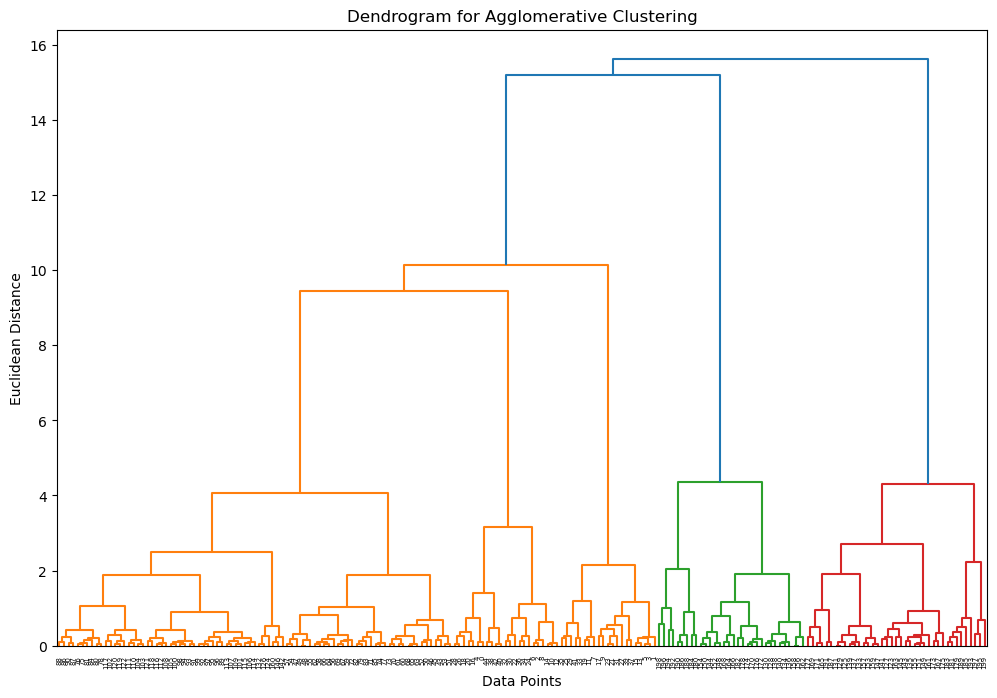

In [58]:
# Create a new figure with a specific size for the dendrogram
plt.figure(figsize=(12, 8))

# Plot the dendrogram using the linkage matrix (linked), where:
# - orientation='top' means the root of the dendrogram will be at the top.
# - distance_sort='descending' sorts clusters by descending distances between them.
# - show_leaf_counts=True will display the number of points in each cluster.
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add a title to the plot to describe it as a dendrogram for agglomerative clustering
plt.title('Dendrogram for Agglomerative Clustering')

# Label the x-axis as 'Data Points' since the horizontal axis represents the individual data points or clusters
plt.xlabel('Data Points')

# Label the y-axis as 'Euclidean Distance' because the vertical axis represents the distance between merged clusters
plt.ylabel('Euclidean Distance')

# Display the plot
plt.show()

The dendrogram provides a visual representation of how clusters are formed and merged. The height of the lines indicates the distance (dissimilarity) between clusters when they are merged.

### Step 2: Apply Agglomerative Clustering

In [60]:
# Perform agglomerative clustering with the following parameters:
# - n_clusters=4: Specifies that we want to group the data into 4 clusters.
# - metric='euclidean': Specifies that the Euclidean distance will be used to measure the similarity between data points.
# - linkage='ward': Specifies that Ward’s method will be used to minimize the variance within clusters when merging them.
agglom = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [62]:
# Fit and predict the clusters
clusters = agglom.fit_predict(X_scaled)

In [64]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

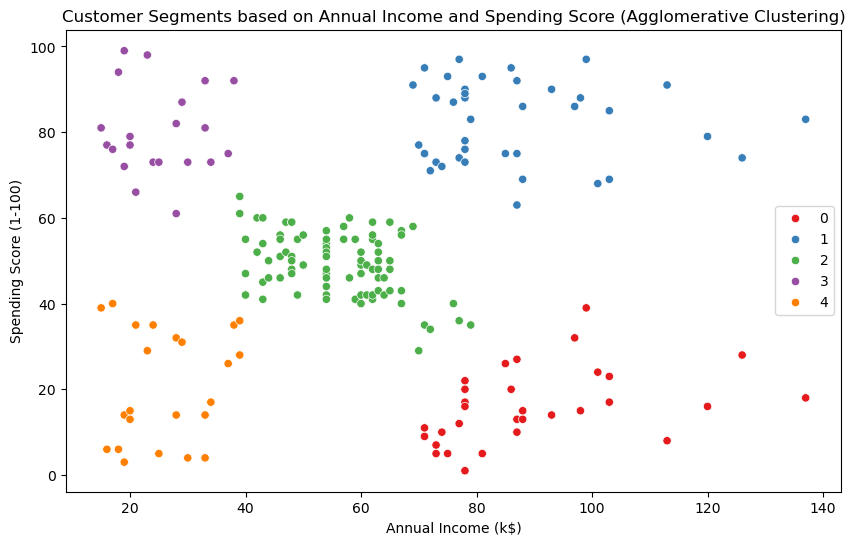

In [66]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Segments based on Annual Income and Spending Score (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The scatter plot shows the clusters identified by the Agglomerative Clustering algorithm based on annual income and spending score.

In [ ]:
#### Practice Questions

#  Modify the code to use a different linkage method, such as single linkage or complete linkage. How does the clustering result change?

## 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** forms clusters based on how dense the data points are in space. It's great for detecting arbitrary-shaped clusters and handling noise, making it useful for real-world data with irregular cluster shapes or outliers.

**How DBSCAN Works:**
- **Core Points:** The algorithm looks for points that have many neighboring points within a certain distance. These are called core points because they are in dense regions.

- **Neighborhood (ε or epsilon):** This is a defined radius around each point. If a point has enough neighbors (determined by a parameter called min_samples) within this radius, it becomes a core point.

- **Clusters:** Core points that are close to each other are grouped together to form clusters.

- **Border Points:** These are points that are not core points but are within the neighborhood of a core point. They belong to the same cluster as the core point.

- **Noise Points:** If a point is neither a core point nor a border point, it’s considered noise or an outlier and doesn’t belong to any cluster.

#### **Key Terms**:
- **Epsilon (ε)**: The maximum distance between two points to be considered as neighbors.
- **MinPts**: The minimum number of points required to form a dense region (a cluster).
- **Core Point**: A point with at least `MinPts` within its `ε`-neighborhood.
- **Border Point**: A point that is within `ε` distance of a core point but does not have enough points to be a core point itself.
- **Noise Point**: A point that is neither a core point nor a border point.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
# Load the dataset (Mall Customer Segmentation Data)

data = pd.read_csv("Mall_Customers.csv")

# Inspect the first few rows of the dataset to understand its structure
data.head()

Again, We will use 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for clustering.

In [ ]:
# Extract the relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardizing ensures all features are on the same scale, which is crucial for DBSCAN as it relies on distance measurements.

#### Perform DBSCAN clustering

In [ ]:
# DBSCAN parameters: epsilon (ε) and min_samples (MinPts)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [ ]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1')
plt.title('Customer Segments based on Annual Income and Spending Score (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Explanation:
# In the scatter plot, different colors represent different clusters identified by DBSCAN. Noise points are usually labeled as -1.

In [ ]:
# Summary of clustering results
print("Number of clusters found:", len(set(clusters)) - (1 if -1 in clusters else 0)) # Excluding noise (-1)
print("Number of noise points:", list(clusters).count(-1))

- **DBSCAN** identifies clusters based on the density of points. It defines clusters as areas of high density separated by areas of low density. Points are classified as core, border, or noise based on their density and proximity.
- **Epsilon (ε)**: Determines the radius of the neighborhood around each point. A smaller ε can lead to many noise points, while a larger ε might merge distinct clusters.
- **MinPts**: Defines the minimum number of points required to form a dense region. A higher MinPts value might lead to fewer clusters and more noise.

### Comparison with K-Means and Hierarchical Clustering:

- **DBSCAN**:
  - **Advantages**: No need to specify the number of clusters, identifies clusters of arbitrary shape, handles noise well.
  - **Disadvantages**: Requires careful parameter tuning (`eps` and `min_samples`), performance can degrade with very large datasets.

- **K-Means**:
  - **Advantages**: Simple and efficient, works well with spherical clusters.
  - **Disadvantages**: Requires specifying the number of clusters, sensitive to the initial placement of centroids.

- **Hierarchical Clustering**:
  - **Advantages**: No need to specify the number of clusters, provides a dendrogram for visualizing the clustering process.
  - **Disadvantages**: Computationally expensive for large datasets, less effective for very large or high-dimensional data.
